
**Background and Context**

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.


**Data Dictionary**
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

**Objective**
To construct a model to predict the whether liability customer will buy loan or not.

Question we want to answer:

1. Which variables are most significant in predicting customer behavor in buying loan?
2. Which location is important in terms of buying loan ?
3. Does income have any relationship with buying loan ?
4. Does education have any relationship with buying loan?
5. Which Age group buys the loan?
6. Does family size have any relationship with loan buying preference?


In [ ]:
# Load the libraries
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from scipy.interpolate import griddata
# Command to limit decimal values to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the file
data = pd.read_csv('/content/drive/MyDrive/AIML/Loan_Project3/Loan_Modelling.csv')

In [ ]:
loandata=data.copy()

In [ ]:
loandata.shape

(5000, 14)

In [ ]:

print(f'This data has {loandata.shape[0]} rows and {loandata.shape[1]} columns')

This data has 5000 rows and 14 columns


In [ ]:
loandata.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000,2,0,0,0,0,0,1


#Feature Engineering

In [ ]:
loandata.isnull().sum().sort_values(ascending=False) # if there are any null values in the data or missing values

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
print (loandata.nunique()) # This prints the number of unique values.

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64


In [ ]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* There are no missing values in the dataset.  
* There are no object (string) dtype.
* Our purpose is to predict Personal loan and this is our response variable. Rest of the variables are predictor variables.
* Sine ID is not a variable and we will delete this.


In [ ]:
# lets drop ID column since it will not be included in our model.
loandata.drop(['ID'],axis=1,inplace=True)

In [ ]:
# lets check if there are duplicates
loandata.duplicated().sum()

0

In [ ]:
# lets check if there are duplicates
loandata.duplicated().sum() # this line checks how many duplicate lines are there
loandata[loandata.duplicated(keep=False) == True]
# If there are duplicate we would do this: df.drop(TTT, inplace=True), in place of TTT include the ID number or row number, I am writing this for my reference.

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


Great there are no duplicate entries.

# Preprocessing

Lets separate the variables here.
* Personal_Loan is our response variable. This is yes/no. So this should be categorical. 
* CD_Account, Securities_Account, Online, CreditCard, ZIPCode, Education: These are categories, so we have to convert them to categorical variables.

In [ ]:
# changing the variable type.
columnTOconvert = ['Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode', 'Education']
loandata[columnTOconvert] = loandata[columnTOconvert].astype('category')

In [ ]:
# Lets check for negative values
loandata[loandata['Experience']<0].count()

Age                   52
Experience            52
Income                52
ZIPCode               52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal_Loan         52
Securities_Account    52
CD_Account            52
Online                52
CreditCard            52
dtype: int64

There are 52 rows that have negative values for experience. Lets delete those, we could change those to positive also but we need to have reason to do so. Lets just get rid of those negative rows.

In [ ]:
loandata1 = loandata.drop(loandata.index[loandata['Experience'] < 0])

In [ ]:
# Lets check if above line worked
loandata1[loandata1['Experience']<0].count()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Great! It worked!

In [ ]:
loandata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4948 non-null   int64   
 1   Experience          4948 non-null   int64   
 2   Income              4948 non-null   int64   
 3   ZIPCode             4948 non-null   category
 4   Family              4948 non-null   int64   
 5   CCAvg               4948 non-null   float64 
 6   Education           4948 non-null   category
 7   Mortgage            4948 non-null   int64   
 8   Personal_Loan       4948 non-null   category
 9   Securities_Account  4948 non-null   category
 10  CD_Account          4948 non-null   category
 11  Online              4948 non-null   category
 12  CreditCard          4948 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 329.8 KB


Yes! The data is converted to categories. Also not that the file size reduced from 547 KB to 329.8 KB

In [ ]:
loandata1.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.600,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.500,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.000,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.700,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.000,2,0,0,0,0,0,1


In [ ]:
loandata1[loandata1['Income']<0].count()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
loandata1[loandata1['Age']<0].count()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
loandata1[loandata1['CCAvg']<0].count()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
loandata1[loandata1['Income']<0].count()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Great! There are no negative numbers now. We are good to do Exploratory Data Analysis (EDA): Our datafile is: **loandata1**

#EDA

#Continuous variable

In [ ]:
loandata1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4948.000,45.557,11.321,24.000,36.000,46.000,55.000,67.000
Experience,4948.000,20.331,11.312,0.000,10.750,20.000,30.000,43.000
Income,4948.000,73.814,46.113,8.000,39.000,64.000,98.000,224.000
Family,4948.000,2.391,1.148,1.000,1.000,2.000,3.000,4.000
CCAvg,4948.000,1.936,1.748,0.000,0.700,1.500,2.600,10.000
Mortgage,4948.000,56.634,101.829,0.000,0.000,0.000,101.000,635.000


###**Summary**
* There are 4948 rows.
* Mean age of suctomer if 45.5 years and it varies from 24 to 67 years.
* Customers experience vary from 0 to 43 years, with mean 20.33. Median customer experience (20) is slightly smaller than mean. This means experience is right skewed.
* Avergae income is $ 73.8K. This is also right skewed and it varies from 8K to 224K.
* Average family size is 2.39. Family size varies from 1 through 4.
* Mortgage is heavily right skewed. The mean mortgage amount is 56.6K whereas the median is 0. Maximum mortgage is 635K. 

#Categorical variables

In [ ]:
loandata1.describe(include=["category"])

,ZIPCode,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,4948,4948,4948,4948,4948,4948,4948
unique,467,3,2,2,2,2,2
top,94720,1,0,0,0,1,0
freq,164,2080,4468,4432,4646,2954,3493


* There are 467 unique zipcode locations. Of all zipcode 94720 is the most frequent, meaning most customers are from here. This is Berkley City, CA. I checked it in google. This means most customers are from Berkley city CA.
* There are three levels of education (undergrad, grad, advance). Among all undergrad is most frequent. This means most customers are undergraduates.
* There are two categories of Personal_loans, Securities_Account, CD_Account, and CreditCard. Among these most customers do not have personal loan, do not have securities_account, CD_account, and do not use credit card issued by bank other than All Life Bank. 
* Most customers use online banking facilities.

### Univariate Analysis
The main purpose of doing univariate analysis is to understand the data central tendency and dispersion.

In [ ]:
loandata1.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.600,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.500,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.000,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.700,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.000,2,0,0,0,0,0,1


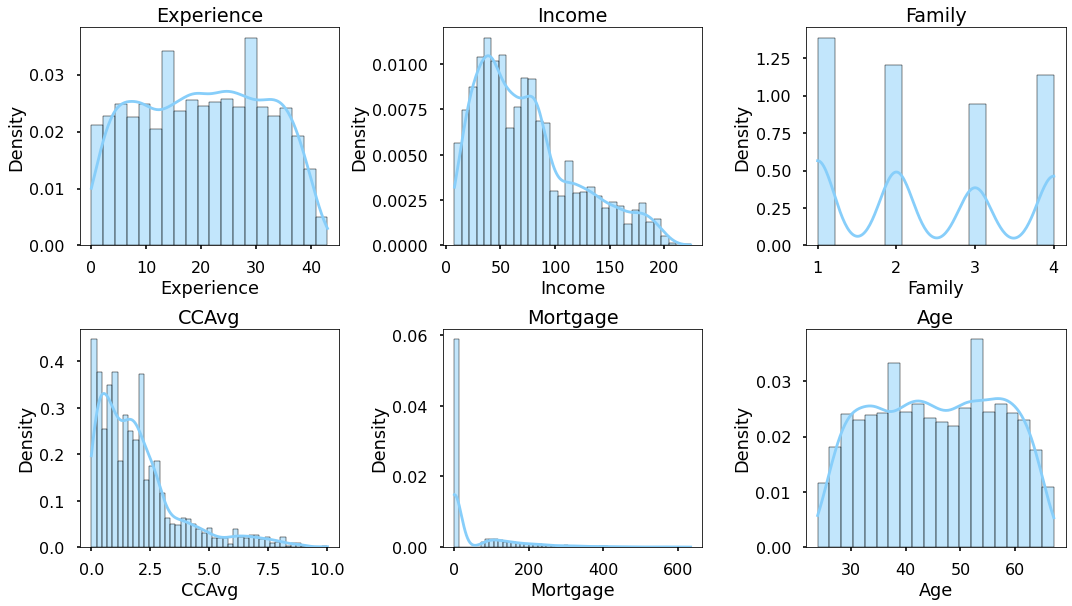

In [ ]:
#Lets select columns we want to plot.
selected_columns = ['Experience','Income','Family','CCAvg', 'Mortgage', 'Age'] #Select columns to plot
plt.figure(figsize=(15, 12)) # Figure size

for i, variable in enumerate(selected_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=loandata1,x=variable,stat='density',color = "lightskyblue",kde=True) # kde plots the density
    plt.tight_layout()
    plt.title(variable)

plt.show()

###**Summary**
* Income, CCAvg, and Mortgage are right skewed.
* Age and Experience have similar distributions, there are two majore peaks but mostly uniform within a range.

Lets see this using boxplots, as they display outliers very clearly.

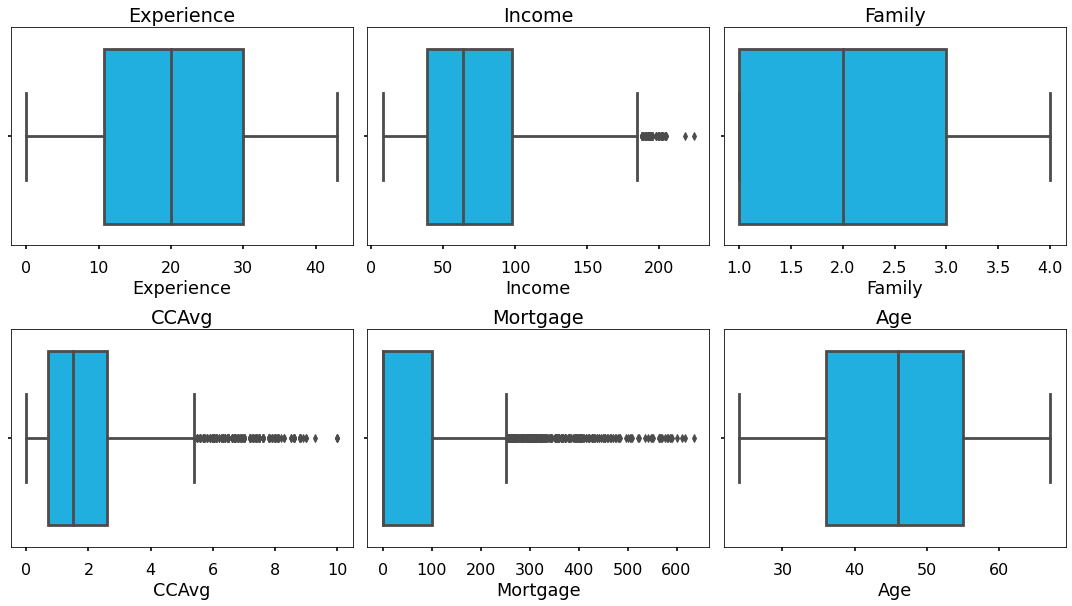

In [ ]:
selected_columns = ['Experience','Income','Family','CCAvg', 'Mortgage', 'Age']#Select columns to plot
plt.figure(figsize=(15, 12)) # Figure size

for i, variable in enumerate(selected_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=loandata1, x=variable, color = "deepskyblue")
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are many outliers in Income, CCAvg, and Mortgage. 
These do not look unrealistic, as there are many. **So, lets not delete these outliers.**
* There are no outliers in Experience, Family and Age.


In [ ]:
# function below creates labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

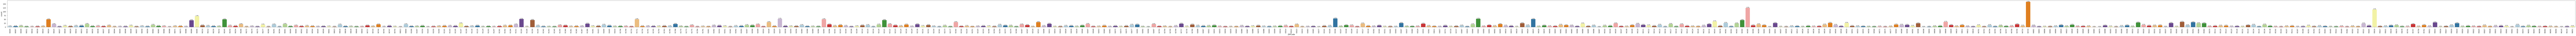

In [ ]:
labeled_barplot(loandata1, "ZIPCode", perc=True)

* Zipcode 94720, **Berkley City CA** has the highest, 3.3% customers. I checked this zipcode in google.

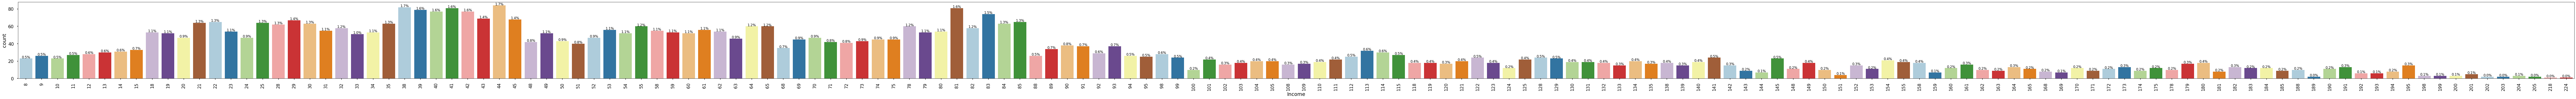

In [ ]:
labeled_barplot(loandata1, "Income", perc=True)

*Most customers are between age group 38 and 44. This is the most important age group to focus in terms of business.
*Customers below 18 and above 88 are less than 1%.

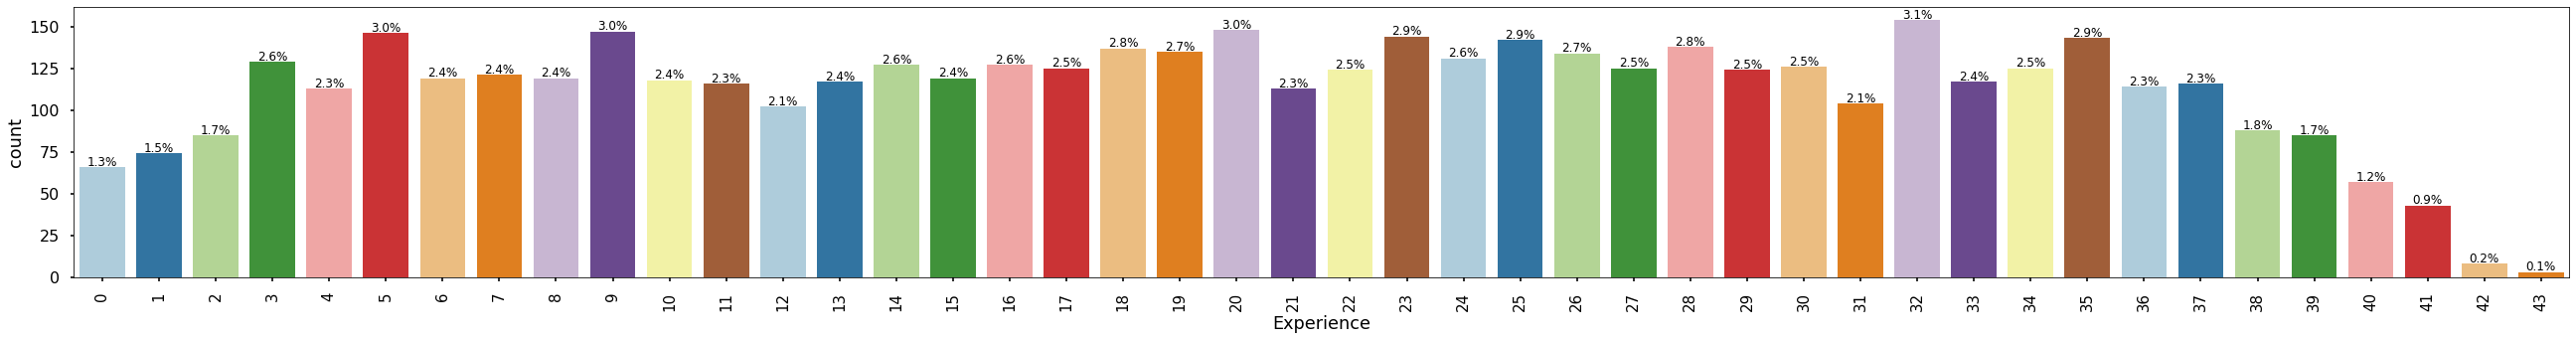

In [ ]:
labeled_barplot(loandata1, "Experience", perc=True)

* Less than 2% customers have 2 years or lower/ 38 years and higher years of experience.
* Most customers have 3-37 years of experience.

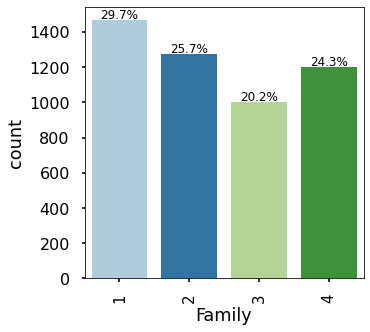

In [ ]:
labeled_barplot(loandata1, "Family", perc=True)

* Almost one-third cusmtomers (29.7%) are single.
* 25.7% have twofamily members.
* 24.3% have four family members.

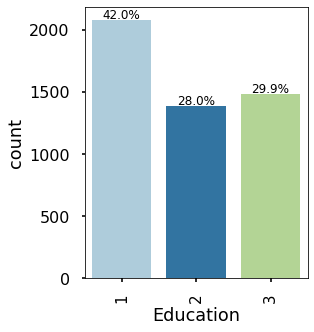

In [ ]:
labeled_barplot(loandata1, "Education", perc=True)

* 42% are undergraduates. They sonstitute the most.
* 29.9% have advance degree.

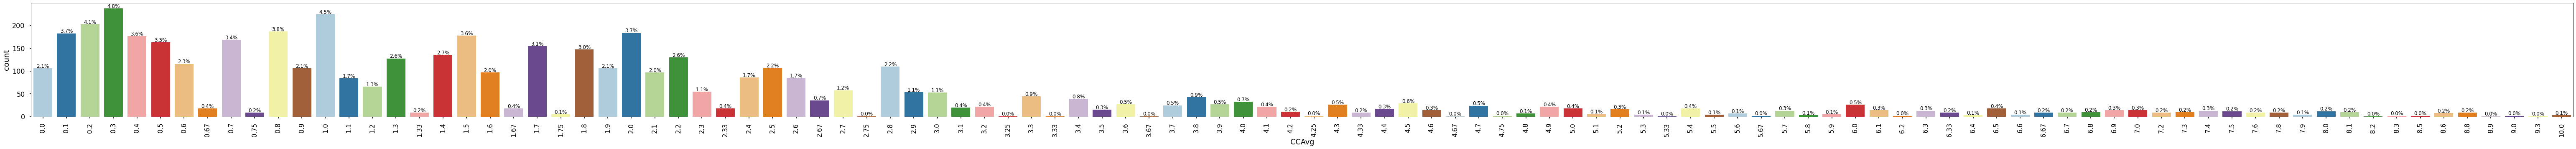

In [ ]:
labeled_barplot(loandata1, "CCAvg", perc=True)

* Most customers spend less than 2 thousand per month in credit card.
* 4.8% customers spend 0.3 thousand per month.

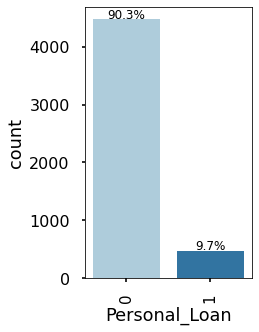

In [ ]:
labeled_barplot(loandata1, "Personal_Loan", perc=True)

* 90.3% customers did not accept personal loans.
* 9.7% customers accepted loans.

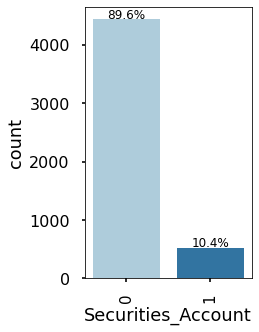

In [ ]:
labeled_barplot(loandata1, "Securities_Account", perc=True)

* 89.6% customers do not have security account with the bank.

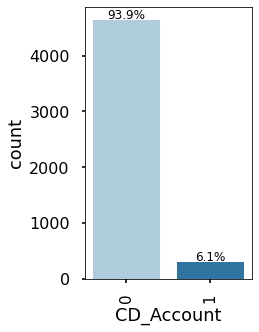

In [ ]:
labeled_barplot(loandata1, "CD_Account", perc=True)

* 93.9% customers do not have CD account.

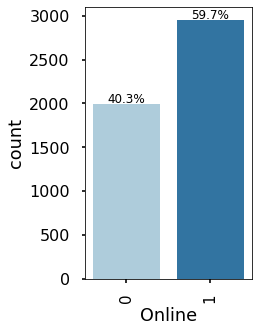

In [ ]:
labeled_barplot(loandata1, "Online", perc=True)

* 40.3% customers dont use online banking, while 59.7% use online banking service. So, bank should focus on making online services more efficient.

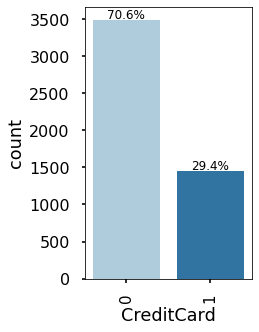

In [ ]:
labeled_barplot(loandata1, "CreditCard", perc=True)

* 70.6% customers dont have credit card issued by another bank.
* Only 29.4% have the credit card issued by All Life bank.

In [ ]:
loandata1.dropna(inplace=True) # There are no NAs.

### Bivariate & Multivariate Analysis

In [ ]:
loandata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4948 non-null   int64   
 1   Experience          4948 non-null   int64   
 2   Income              4948 non-null   int64   
 3   ZIPCode             4948 non-null   category
 4   Family              4948 non-null   int64   
 5   CCAvg               4948 non-null   float64 
 6   Education           4948 non-null   category
 7   Mortgage            4948 non-null   int64   
 8   Personal_Loan       4948 non-null   category
 9   Securities_Account  4948 non-null   category
 10  CD_Account          4948 non-null   category
 11  Online              4948 non-null   category
 12  CreditCard          4948 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 329.8 KB


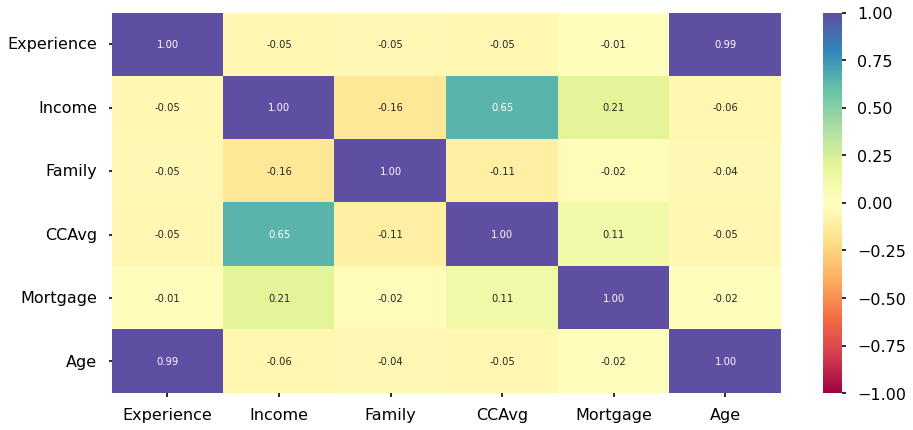

In [ ]:
# Include only numeric variables
select_var =  ['Experience','Income','Family','CCAvg', 'Mortgage', 'Age'] # select variable column
corr = loandata1[select_var].corr()
# display heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**summary**
* Age is highly correlated with Experience. We should get rid of this for our logistic model, it could be problematic due to multicollinearity. This will not be an issue for decision tree modeling.
* Income is correlated with average spending per month in credit card (0.65).
Price of car is higher for higher CC engine cars. This is true for both used and new car.
* There is small positive correlation between credit card spending and mortgage amount (0.11).
* Correlations among most other variables are small.

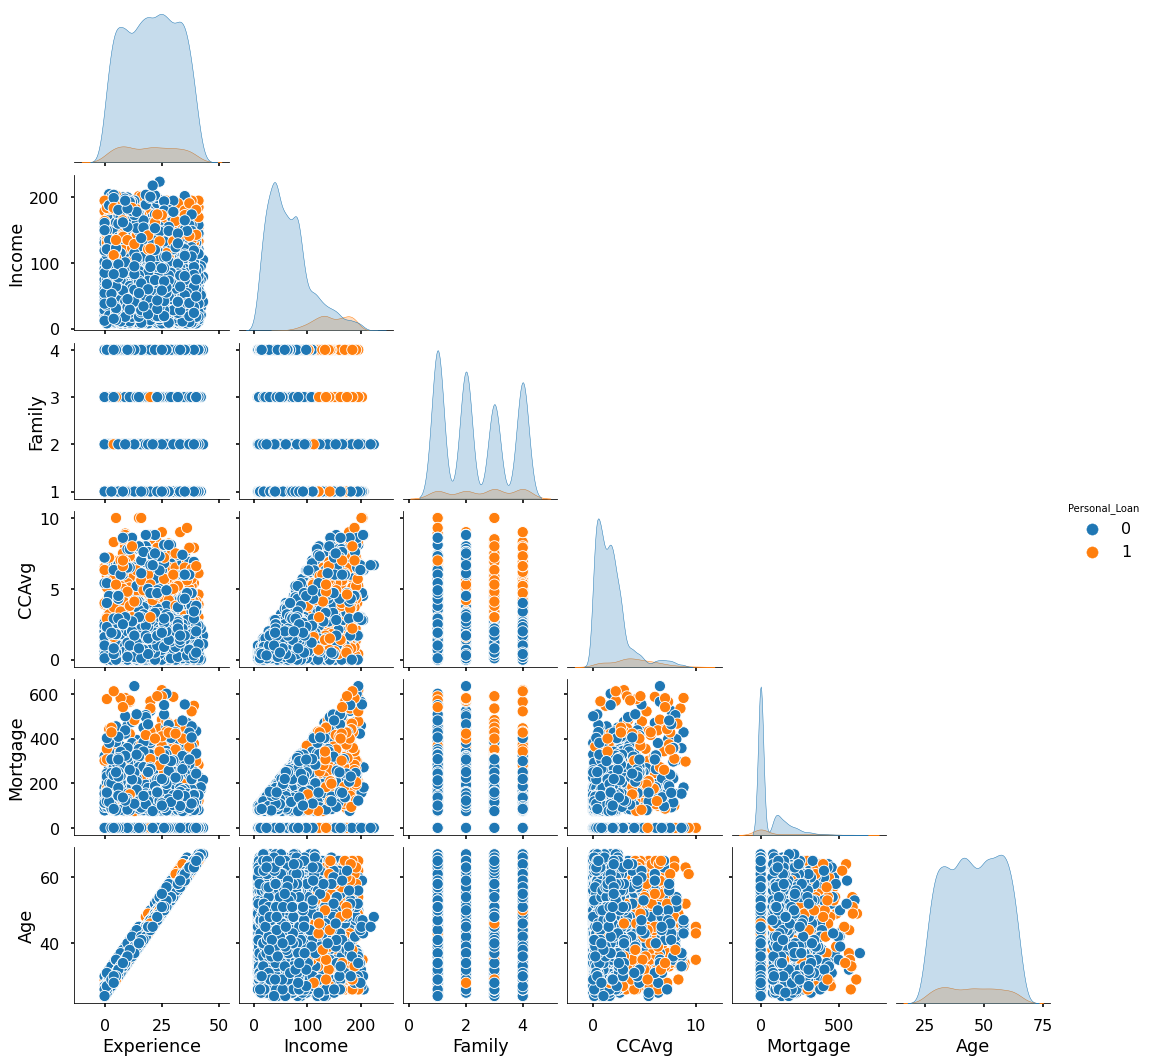

In [ ]:
#plot scatterplot categorised by Locations
sns.pairplot(data=loandata1, vars=['Experience','Income','Family','CCAvg', 'Mortgage', 'Age'], hue='Personal_Loan', corner=True);

* Most conclusions are already mentioned above in earlier figures.
* Customers who do not have personal loan are way higher than those having loan.

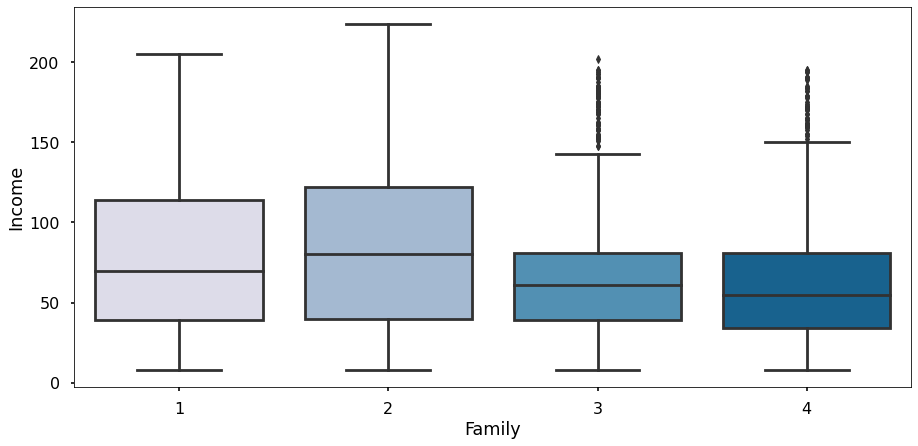

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = loandata1, x = loandata1["Family"], y = loandata1["Income"],palette="PuBu")
plt.show()

* Family size 2 has much higher income than family size 1, 3, and 4. This means married people without kids earn more.
*Family size 4 earn least compared to other family sizes.

* There is a huge variability in income in family size 2.

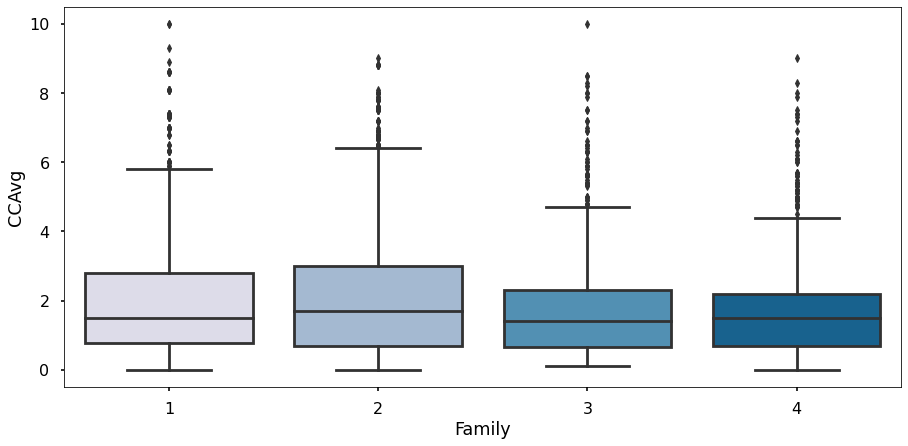

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = loandata1, x = loandata1["Family"], y = loandata1["CCAvg"],palette="PuBu")
plt.show()

* Average spending of family size of 2 is much than other family sizes.
* Family size 4 spend within a very small range compared to other family sizes. 

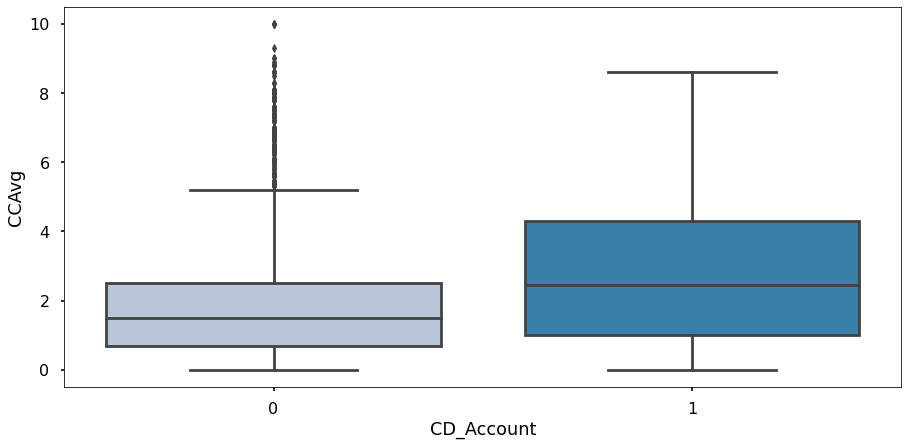

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = loandata1, x = loandata1["CD_Account"], y = loandata1["CCAvg"],palette="PuBu")
plt.show()

* Spending of customers having CD account is higher than those not having the account.
* Most customer not having CD account spend much less than those having CD Account (look at the width of the box).

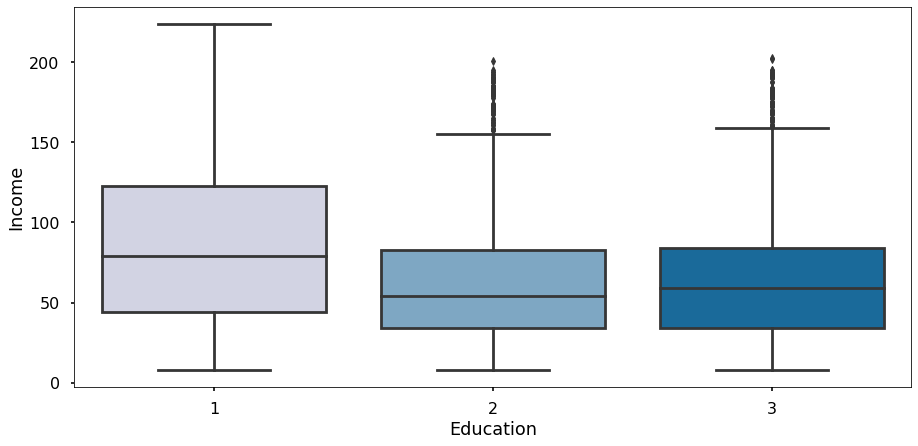

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = loandata1, x = loandata1["Education"], y = loandata1["Income"],palette="PuBu")
plt.show()

* Undergraduates are earning more than graduats and advanced degree holders.
* There are outliers in income of graduates and advance degree holders whereas not in ndergraduate degree holders.

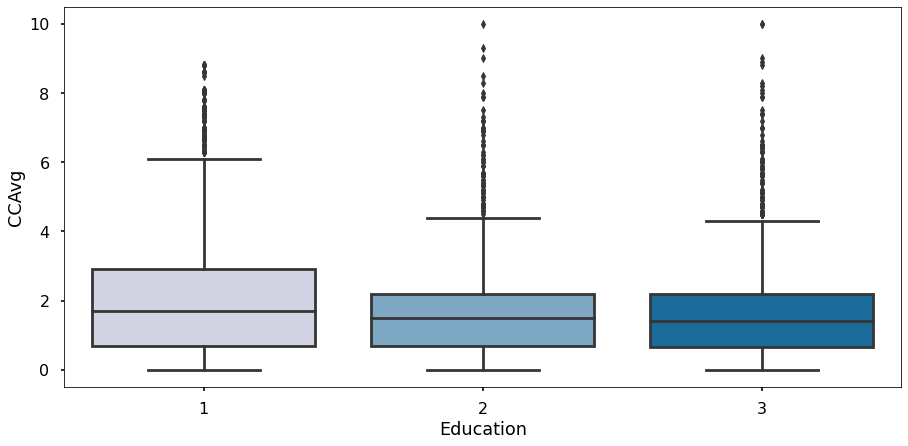

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = loandata1, x = loandata1["Education"], y = loandata1["CCAvg"],palette="PuBu")
plt.show()

* most Undergrdautes are spending in credit card more than graduates and advance degree holders.

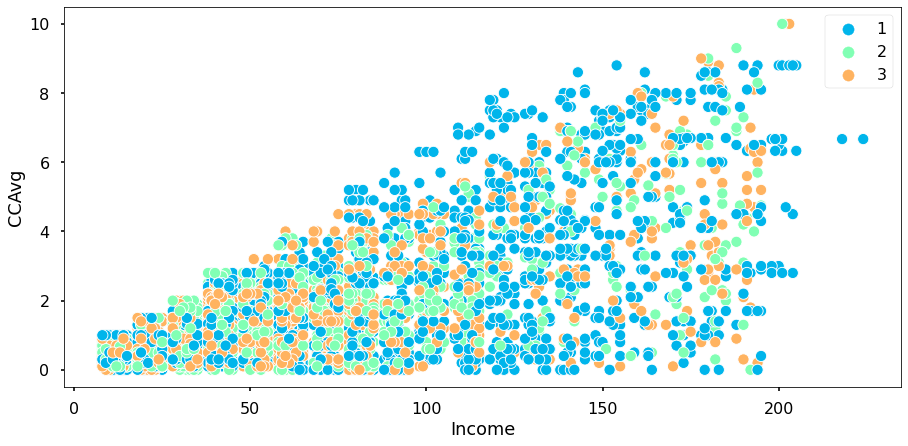

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = loandata1, x = loandata1["Income"], y = loandata1["CCAvg"],hue=loandata1["Education"],ci=0,palette="rainbow")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* As income increases, credit card spending also increases for all levels of eductaion.

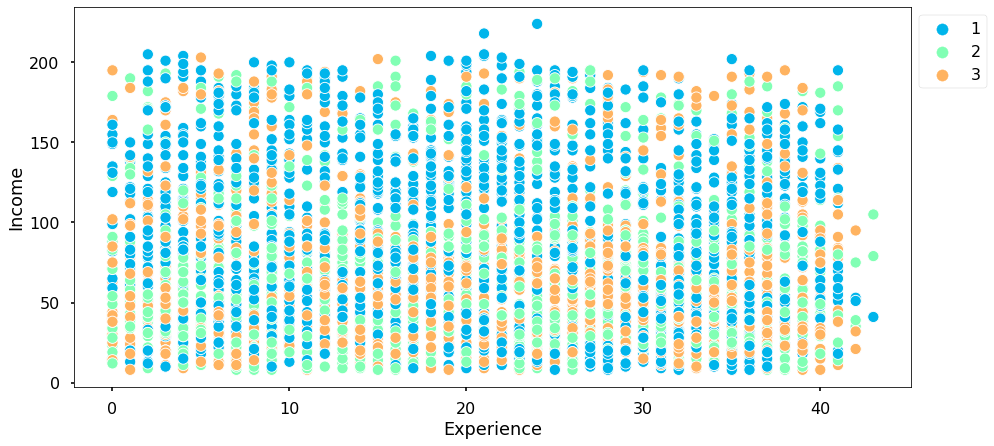

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = loandata1, x = loandata1["Experience"], y = loandata1["Income"],hue=loandata1["Education"],ci=0,palette="rainbow")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Experience does not have any relationship with income.

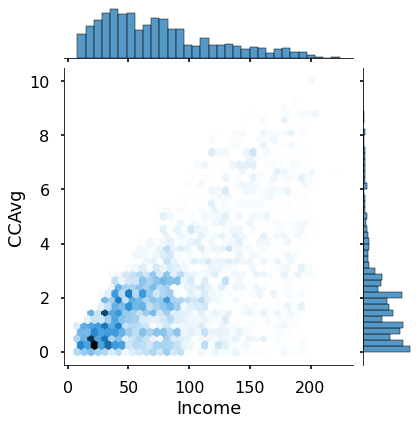

In [ ]:
# joint plot of income and education
sns.jointplot(data=loandata1, x='Income', y='CCAvg', kind = 'hex');

* There are many people who earn less than 50 K (look at the adrk hexagon), and these people also spend less in credit card. From the business perspective, these people may not be our client to sell the expensive mortgages.

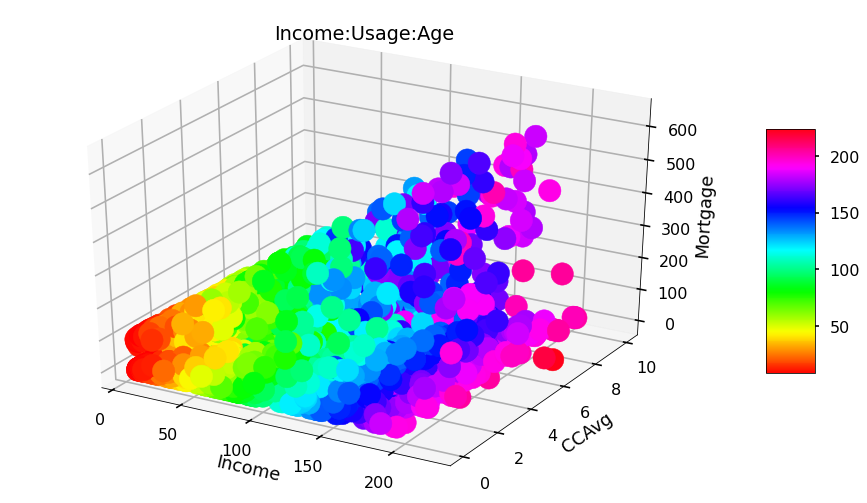

In [ ]:
# Import libraries
# It displays a warning message and we import the following package to hide that
import warnings
warnings.filterwarnings('ignore')
x=loandata1['Income'] #Select Usage
y=loandata1['CCAvg'] # Select Education
z=loandata1['Mortgage'] #Select Age
# Plot figure
fig = plt.figure(figsize = (16, 9)) # figure size
ax = plt.axes(projection ="3d")
# Creating x y grid boxes or gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# select your color bar
texan = plt.get_cmap('hsv')
 
# Plot the figure
myplot = ax.scatter3D(x, y, z, alpha = 1, s=500, c=x, cmap = texan, marker ='o')
#myplot = ax.scatter3D(x, y, z, alpha = 1, c = (x + y + z), cmap = texan, marker ='*')
 
plt.title("Income:Usage:Age")
ax.set_xlabel('Income', labelpad=15, rotation = 270)
ax.set_ylabel('CCAvg', labelpad=15,  rotation = 270)
ax.set_zlabel('Mortgage', labelpad=15, rotation = 90)
fig.colorbar(myplot, ax = ax, shrink = 0.5, aspect = 5)
# show plot
plt.show()

* Great! This showed an interesting pattern here. People who earn more, spend more in credit card and had higher mortgages also. This may be obvious but from the business perspective, we can target to these people to sell our mortgages. 

## Conclusions and Recommendations based on EDA

##**Conslucions:**
*	This data has 5000 rows and 14 columns
*	Personal_Loan is the response variable and others are predictor variables.
*	Among predictor variables there are two types: Categorical (CD_Account, Securities_Account, Online, CreditCard, ZIPCode, Education)and continuous (Experience, Income, Family,CCAvg, Mortgage, Age)
*	There are no missing values in the dataset. 
*	There are no duplicate entries.
*	Mean age of customer if 45.5 years and it varies from 24 to 67 years.
*	Customers experience vary from 0 to 43 years, with mean 20.33. Median customer experience (20) is slightly smaller than mean. This means experience is right skewed.
*	Average income is $ 73.8K. This is also right skewed and it varies from 8K to 224K.
*	Average family size is 2.39. Family size varies from 1 through 4.
*	Mortgage is heavily right skewed. The mean mortgage amount is 56.6K whereas the median is 0. Maximum mortgage is 635K.
*	There are 467 unique zipcode locations. Of all zipcode 94720 is the most frequent, meaning most customers are from here. This is Berkley City, CA. This means most customers are from Berkley city CA.
*	There are three levels of education (undergrad, grad, advance). Among all undergrad is most frequent. This means most customers are undergraduates. 
*	Most customers use online banking facilities.
*	Income, CCAvg, and Mortgage are right skewed.
*	Age and Experience have similar distributions, there are two major peaks but mostly uniform within a range.
*	Most customers are between age group 38 and 44. This is the most important age group to focus in terms of business. 
* Customers below 18 and above 88 are less than 1%.
*	Less than 2% customers have 2 years or lower/ 38 years and higher years of experience.
*	Most customers have 3-37 years of experience.
*	Almost one-third customers (29.7%) are single.
*	25.7% have two family members.
*	24.3% have four family members
*	42% are undergraduates. They constitute the most.
*	29.9% have advance degree.
*	Most customers spend less than 2 thousand per month in credit card.
*	4.8% customers spend 0.3 thousand per month.
*	90.3% customers did not accept personal loans.
*	9.7% customers accepted loans.
*	89.6% customers do not have security account with the bank.
*	93.9% customers do not have CD account.
*	40.3% customers dont use online banking, while 59.7% use online banking service. So, bank should focus on making online services more efficient.
*	70.6% customers dont have credit card issued by another bank.
*	Only 29.4% have the credit card issued by All Life bank.
*	Income is correlated with average spending per month in credit card (0.65)* Price of car is higher for higher CC engine cars. This is true for both used and new car.
*	There is small positive correlation between credit card spending and mortgage amount (0.11).
*	Family size 2 has much higher income than family size 1, 3, and 4. This means married people without kids earn more.
*	Family size 4 earn least compared to other family sizes.
*	There is a huge variability in income in family size 2.
*	Average spending of family size of 2 is much than other family sizes.
*	Family size 4 spend within a very small range compared to other family sizes.
*	Spending of customers having CD account is higher than those not having the account.
*	Undergraduates are earning more than graduates and advanced degree holders.
*	There are outliers in income of graduates and advance degree holders whereas not in undergraduate degree holders.
*	Most undergraduates are spending in credit card more than graduates and advance degree holders.
*	As income increases, credit card spending also increases for all levels of education.
*	Age is highly correlated with Experience. We should get rid of this for our logistic model, it could be problematic due to multicollinearity. This will not be an issue for decision tree modeling.
	
##**Recommendations:**
* There are many people who earn less than 50K, and these people also spend less in credit card. From the business perspective, these people may not be our client to sell the expensive mortgages. Focus on customers that earn well above 50 K because these people spend more on their credit card and buy expensive mortgages also.

* Most customer not having CD account spend much less than those having CD Account (look at the width of the box). So, focus on those that have CD account.

* Aim at selling expensive mortagegs to married people with no kids. They earn higher than other familes and also spend more on credit cards than other family sizes.

* People in Berkley city county, California spend more and earn more. This may be one of our target cities to sell expensive mortgages.


# Logistic Regression Model

In [ ]:

# Saving dataset before treating outliers for logistic regression.
LogReg_loandata = loandata1.copy()

###Lets delete the columns that we dont include in the model. Lets see how many unique zipcodes there are.

In [ ]:
LogReg_loandata['ZIPCode'].unique()

[91107, 90089, 94720, 94112, 91330, ..., 90068, 94970, 90813, 94404, 94598]
Length: 467
Categories (467, int64): [90005, 90007, 90009, 90011, ..., 96094, 96145, 96150, 96651]

###There are 467 zip codes. It will be difficult to interpret the results if we include this as factor. Lets delete. Also, lets delete Experience column, as it is highly correlated with Age. We have to avvoid multicollinearity.

In [ ]:
#drop column which we don't need for modelling
LogReg_loandata.drop(columns=["ZIPCode",'Experience'], inplace=True)

In [ ]:
LogReg_loandata.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,49,4,1.600,1,0,0,1,0,0,0
1,45,34,3,1.500,1,0,0,1,0,0,0
2,39,11,1,1.000,1,0,0,0,0,0,0
3,35,100,1,2.700,2,0,0,0,0,0,0
4,35,45,4,1.000,2,0,0,0,0,0,1


###checking for outliers

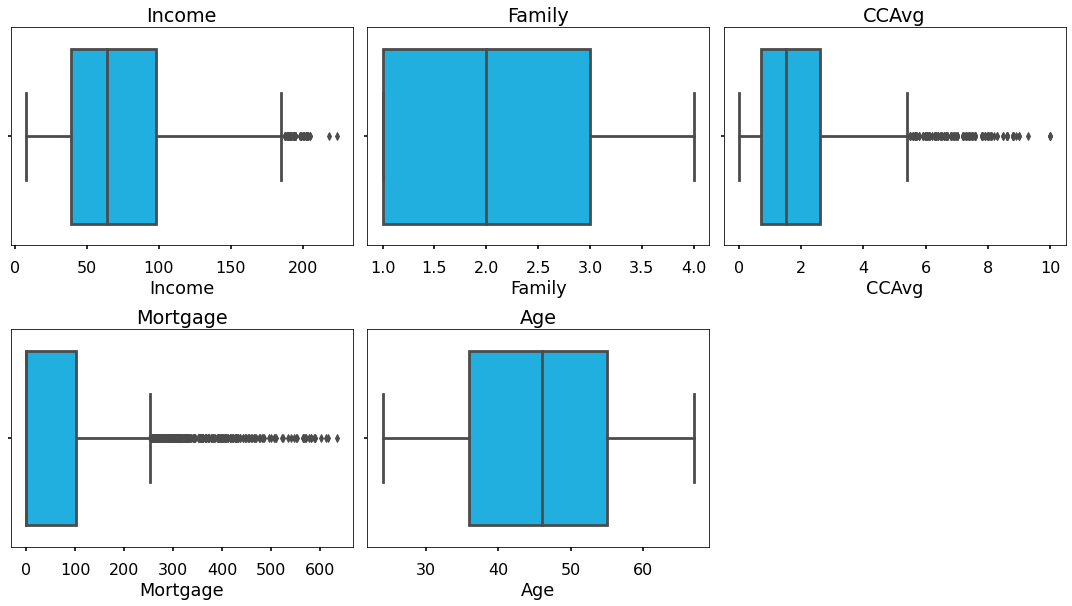

In [ ]:
selected_columns = ['Income','Family','CCAvg', 'Mortgage', 'Age']#Select columns to plot
plt.figure(figsize=(15, 12)) # Figure size

for i, variable in enumerate(selected_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=LogReg_loandata, x=variable, color = "deepskyblue")
    plt.tight_layout()
    plt.title(variable)

plt.show()

Lets not delete any data row. There are some outliers in Income, CCAvg, and Mortgage, but they all seem reasonable. This is a majore step for Logistic Regression. But this does not affect the decision tree model.

In [ ]:
# The above box plots show that most outliers are in Income distributions. Lets dig a bit deeper.
LogReg_loandata.sort_values(by=["Income"],ascending = False).head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3896,48,224,2,6.670,1,0,0,0,1,1,1
4993,45,218,2,6.670,1,0,0,0,0,1,0
2988,46,205,2,8.800,1,181,0,1,0,1,0
526,26,205,1,6.330,1,271,0,0,0,0,1
2278,30,204,2,4.500,1,0,0,0,0,1,0
677,46,204,2,2.800,1,0,0,0,0,1,0
4225,43,204,2,8.800,1,0,0,0,0,1,0
2101,35,203,1,10.000,3,0,1,0,0,0,0
3804,47,203,2,8.800,1,0,0,0,0,1,0
787,45,202,3,10.000,3,0,1,0,0,0,0


This does not look unreasonable. Just look at other valies corrsponding to the most extreme values. So, lets keep all outliers.

In [ ]:
#Lets check the data for final time before writing the model code.
LogReg_loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4948 non-null   int64   
 1   Income              4948 non-null   int64   
 2   Family              4948 non-null   int64   
 3   CCAvg               4948 non-null   float64 
 4   Education           4948 non-null   category
 5   Mortgage            4948 non-null   int64   
 6   Personal_Loan       4948 non-null   category
 7   Securities_Account  4948 non-null   category
 8   CD_Account          4948 non-null   category
 9   Online              4948 non-null   category
 10  CreditCard          4948 non-null   category
dtypes: category(6), float64(1), int64(4)
memory usage: 390.7 KB


Personal_Loan: This is our response variable.
All other are our predictors. There are 5 integer variables, so we dont need to worry about those. Remaining 5 are categorical variables. Among those 5, all are binary except education (it has three levels), so we need to take care of this by onehotencoding. In fact, we could also use Family as categorical variable, but lets not do that. I may try if I have time later.


In [ ]:
X = LogReg_loandata.drop(['Personal_Loan'], axis=1)
Y = LogReg_loandata['Personal_Loan']

oneHotEncoding=['Education']
X=pd.get_dummies(X,columns=oneHotEncoding,drop_first=True)

In [ ]:
X.head() # checking if onehotencoding worked.

,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3
0,25,49,4,1.600,0,1,0,0,0,0,0
1,45,34,3,1.500,0,1,0,0,0,0,0
2,39,11,1,1.000,0,0,0,0,0,0,0
3,35,100,1,2.700,0,0,0,0,0,1,0
4,35,45,4,1.000,0,0,0,0,1,1,0


In [ ]:
#split into test and train sets. Split into 30/70.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1,stratify=Y)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    This function will calculate metrics, based on the threshold specified, to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

##Checking model performance on Training Set

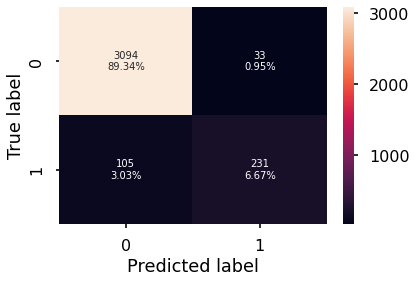

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(lg, X_train, y_train)
print("Model Performance on Training Set: 0.5 Threshold")
log_reg_model_train_perf

Model Performance on Training Set: 0.5 Threshold


,Accuracy,Recall,Precision,F1
0,0.960,0.688,0.875,0.770


##Checking model performance on Test Set

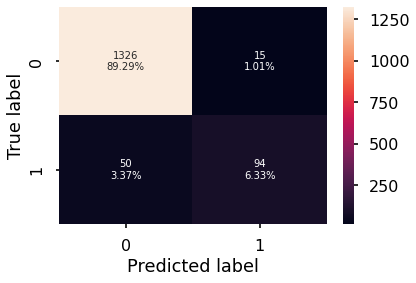

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test)
print("Model Performance on Test Set: 0.5 Threshold")
log_reg_model_test_perf

Model Performance on Test Set: 0.5 Threshold


,Accuracy,Recall,Precision,F1
0,0.956,0.653,0.862,0.743


Lets check the model performance by ROC curve.
Area Under the ROC  Curve (AUC) is a measure of how good a model is. The higher the AUC, the better the model is, at distinguishing between classes.

## **ROC curve of Train Set**

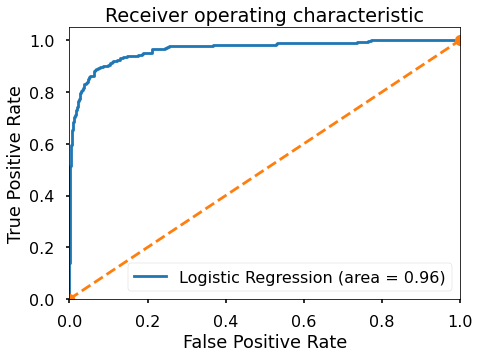

In [ ]:
# ROC on Training Set
logit_roc_auc_train = roc_auc_score(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Lets plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "o--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

## **ROC curve of Test Set**

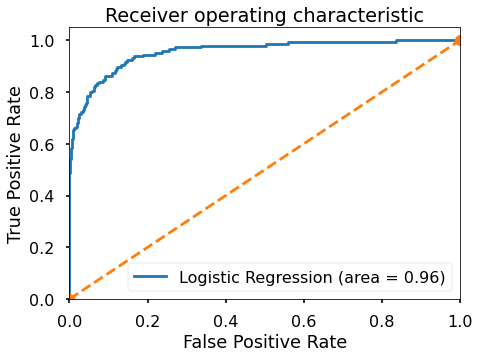

In [ ]:
# ROC curve on Test Set
logit_roc_auc_test = roc_auc_score(
    y_test, lg.predict_proba(X_test)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
# Lets Plot the roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "o--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#ROC on both test and train are 0.96, which is very good.

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
# roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
fpr, tpr, thresholds = roc_curve(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[
    optimal_idx
]  # stores the optimal threshold value
print(optimal_threshold_auc_roc)

0.1519915773060542


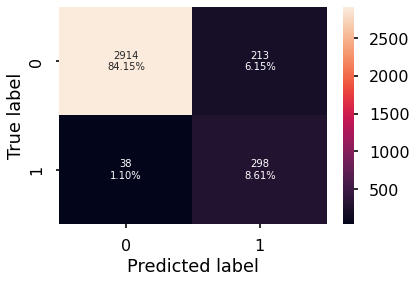

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.928,0.887,0.583,0.704


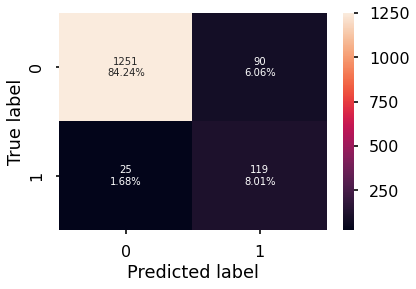

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.923,0.826,0.569,0.674


* We can see that precision/ F1 score of the model for both training and test set reduced after we set our threshold for optimal threshold value.
*  This tells us that the above threshold (0.15) dooes not work. Now we will use Precision-Recall curve and check if we can find a better threshold

precision_recall_curve() will return us: fpr, tpr and threshold 

**Input:** 
        1. Original data
        2. Predicted Probability
        
**Output:** False positive rate, true positive rate and threshold values

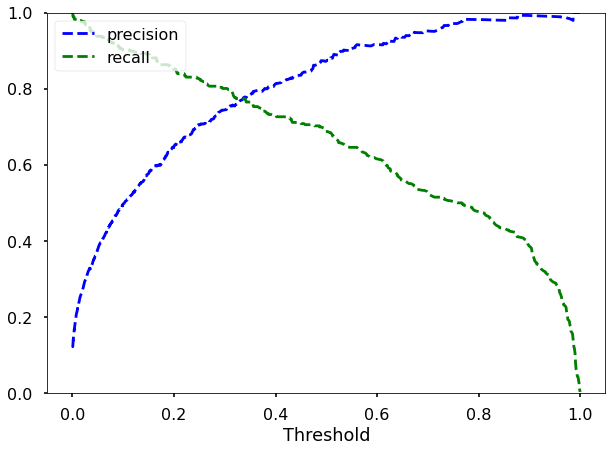

In [ ]:
# Find the predicted probabilities for class 1
y_scores = lg.predict_proba(X_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
# Plot recall precision curve
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.33, we get balanced recall and precision.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.33

#### Checking model performance on training set

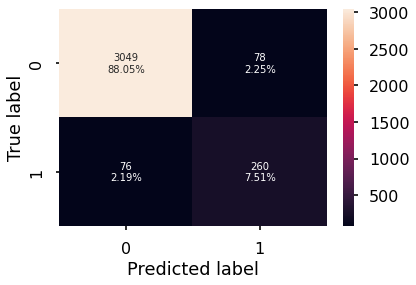

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(lg, X_train, y_train, threshold=optimal_threshold_curve)
print("Training performance: 0.33 Threshold")
log_reg_model_train_perf_threshold_curve

Training performance: 0.33 Threshold


,Accuracy,Recall,Precision,F1
0,0.956,0.774,0.769,0.772


#### Checking model performance on test set

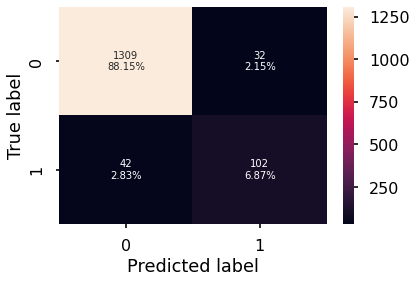

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test, threshold=optimal_threshold_curve)
print("Test set performance: 0.33 Threshold")
log_reg_model_test_perf_threshold_curve

Test set performance: 0.33 Threshold


,Accuracy,Recall,Precision,F1
0,0.950,0.708,0.761,0.734


* Model is performing well on training and test.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.33 as the optimal threshold.

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression: 0.50 Threshold",
    "Logistic Regression: 0.33 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression: 0.50 Threshold,Logistic Regression: 0.33 Threshold
Accuracy,0.960,0.928,0.956
Recall,0.688,0.887,0.774
Precision,0.875,0.583,0.769
F1,0.770,0.704,0.772


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression: 0.5 Threshold",
    "Logistic Regression: 0.33 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression: 0.5 Threshold,Logistic Regression: 0.33 Threshold
Accuracy,0.956,0.923,0.950
Recall,0.653,0.826,0.708
Precision,0.862,0.569,0.761
F1,0.743,0.674,0.734


In [ ]:
GetMyCoefficeints = pd.DataFrame(np.append(model.coef_, model.intercept_),
                       index = X.columns.tolist()+['Intercept'],
                       columns=['Coefficient']).sort_values(by = ['Coefficient'], key = abs, ascending = False)
GetMyCoefficeints.T

,Intercept,Education_3,Education_2,CD_Account,CreditCard,Securities_Account,Family,Online,CCAvg,Income,Age,Mortgage
Coefficient,-12.492,3.572,3.383,3.079,-0.968,-0.692,0.652,-0.581,0.109,0.059,0.001,0.001


###**Conclusion**
* A logistic Regression model is built and this model can be used to predict whether a costomer opts for a personal loan or not.
* The model has f1 score of 0.73 on test set. Optimal threshold of 0.33 gave us higher recall and higher precision, so we use this.

* Education and CD_Account are the two most important predictors or personal_Loan. Higher education and higher CD_Account values are positively associated with personal_Loan. 
* CreditCard has negative relationship with the personal_loan. Similarly, Family, Securities_account, Online have negative impact upon personal_loan. Increase in these variables will affect the probability of a customer taking personal loan.
*  Effect of Mortgage, Age, Income are marginal.

###**Recommendations**
* The bank should focus on more educated  perople whow have CD_Account with the bank. These are the customers who accept personal loan.

* AllLife Bank should not spend too much time on those customers that do not use their credit card. 

* Age and Mortgages are very weak predictors of personal loan compared with other variables, so do not focus much on these variables when talking to potential customers.


# **Decision Tree Model**

Lets build a decision tree model. One thing I like about these models is that you dont have to worry about the outliers. We will build a CART model.

In [ ]:
# Saving dataset before treating outliers for Decision Tree model.
dt_loandata = LogReg_loandata.copy()

In [ ]:
dt_loandata.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,49,4,1.600,1,0,0,1,0,0,0
1,45,34,3,1.500,1,0,0,1,0,0,0
2,39,11,1,1.000,1,0,0,0,0,0,0
3,35,100,1,2.700,2,0,0,0,0,0,0
4,35,45,4,1.000,2,0,0,0,0,0,1


In [ ]:
X_dt = dt_loandata.drop('Personal_Loan', axis=1)
y_dt = dt_loandata['Personal_Loan']

In [ ]:
X_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4948 non-null   int64   
 1   Income              4948 non-null   int64   
 2   Family              4948 non-null   int64   
 3   CCAvg               4948 non-null   float64 
 4   Education           4948 non-null   category
 5   Mortgage            4948 non-null   int64   
 6   Securities_Account  4948 non-null   category
 7   CD_Account          4948 non-null   category
 8   Online              4948 non-null   category
 9   CreditCard          4948 non-null   category
dtypes: category(5), float64(1), int64(4)
memory usage: 385.8 KB


In [ ]:
OneHotEncoder=X_dt.select_dtypes(exclude='number').columns.to_list() # Select the columns to do onehotencoding
X_dt=pd.get_dummies(X_dt,columns=OneHotEncoder,drop_first=True)

In [ ]:
# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.3, random_state=1)

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 

In [ ]:
print(X_train.shape, X_test.shape)

(3463, 11) (1485, 11)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3463
Number of rows in test data = 1485


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0   0.903
1   0.097
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0   0.902
1   0.098
Name: Personal_Loan, dtype: float64


In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', class_weight={0: 0.1, 1: 0.9}, random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

In [ ]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9831649831649831


**Our better measure of model performance is not accuracy. This is because accuracy because the data is heavily imbalanced (for example see ersonal_Loan, CD_Account and other predictors, 90% is 0 and 10% is 1 in both test and train set). So lets use Recall, because we do not want to miss any potential clients, we want to be more accurate in our positive prediction, so RECALL is our better measure of model performance.**

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

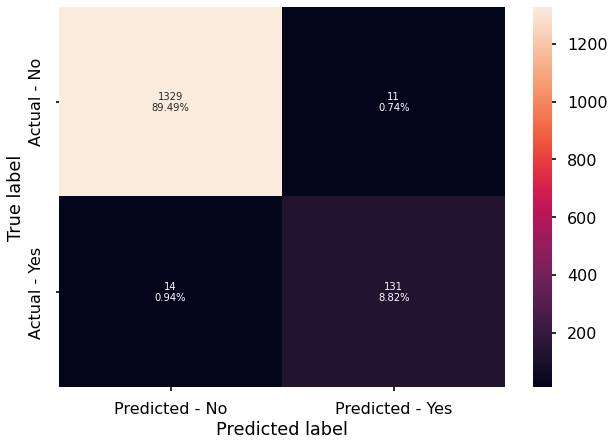

In [ ]:
make_confusion_matrix(dTree,y_test)

In [ ]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.903448275862069


* GREAT, look at how nice the model is, the recall is 0.9.

#Decision Tree Model visualization

In [ ]:
feature_names = list(X_dt.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1']


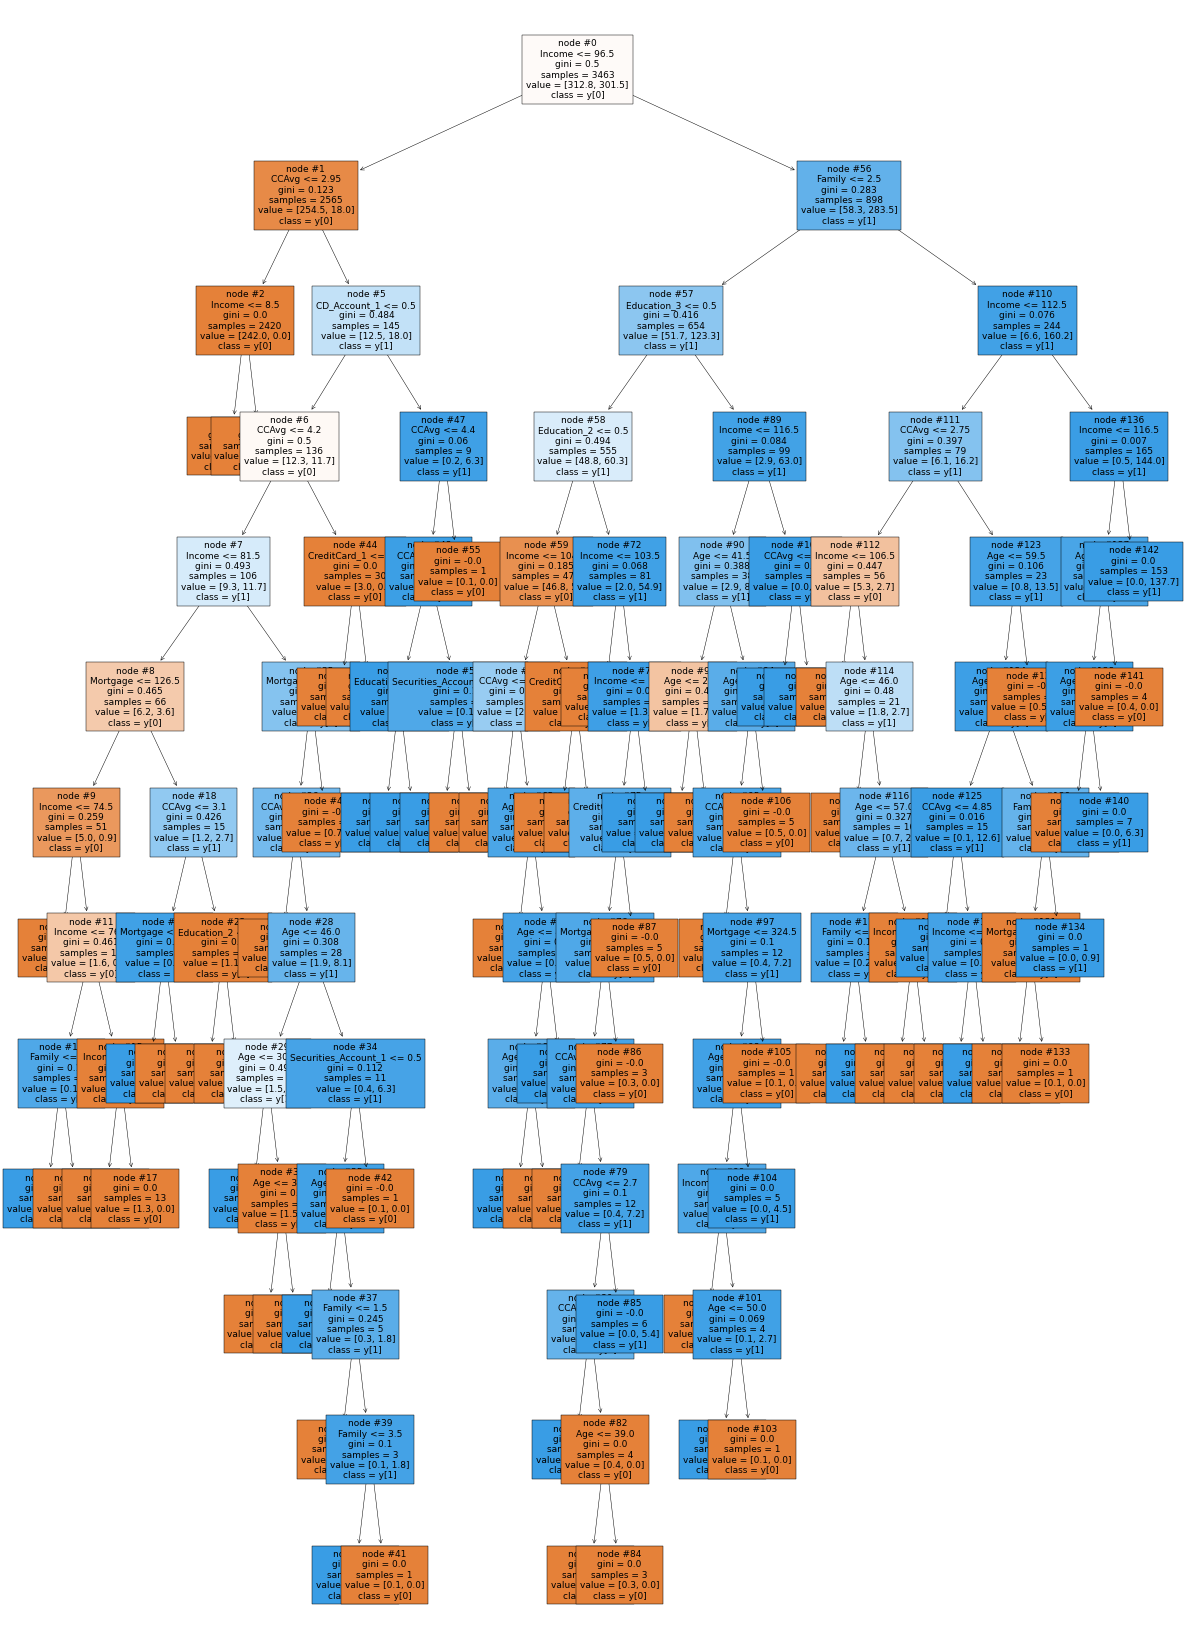

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 96.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 8.50
|   |   |   |--- weights: [1.70, 0.00] class: 0
|   |   |--- Income >  8.50
|   |   |   |--- weights: [240.30, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 4.20
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Mortgage <= 126.50
|   |   |   |   |   |   |--- Income <= 74.50
|   |   |   |   |   |   |   |--- weights: [3.40, 0.00] class: 0
|   |   |   |   |   |   |--- Income >  74.50
|   |   |   |   |   |   |   |--- Income <= 76.50
|   |   |   |   |   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.90] class: 1
|   |   |   |   |   |   |   |   |--- Family >  2.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.10, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  76.50
|   |   |   |   |   |   |   |   |--- Income <= 78.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.20, 0.00] class: 0
|   |   

In [ ]:
# Lets see which features are important in building the tree.
#This is calculated as the normalized total reduction of the criterion brought by that feature. It is also known as the Gini importance.

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                       Imp
Income               0.630
Education_2          0.132
CCAvg                0.100
Education_3          0.044
Family               0.041
Age                  0.033
Mortgage             0.010
CD_Account_1         0.008
CreditCard_1         0.002
Securities_Account_1 0.001
Online_1             0.000


Great! This shows, Income, Family, Education are th emost important predictors of personal_Loan. CCAvg and Age are also important predictors but not as important as the earlier ones.

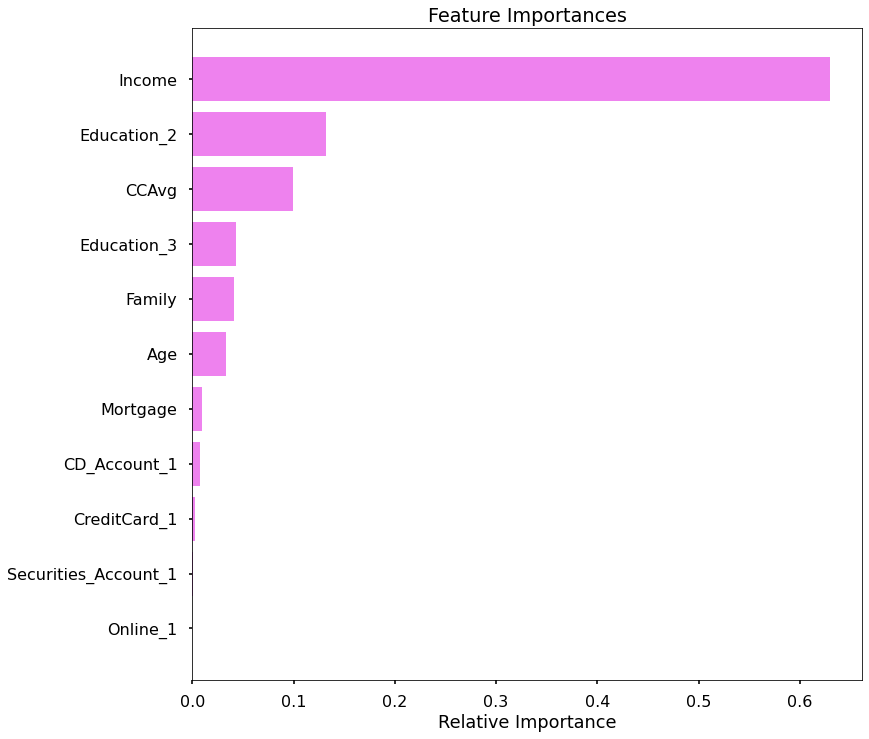

In [ ]:
#Lets plot the feature importance.
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* As mentioned above, Income is the most important predictors. Then, Family and Education come second and third after Income. Then, CCAvg, Age and CD_Account are also important predictors but not as important as the earlier ones. Mortgage, Online, CreditCard and Securities_Account are the least important predictors.

#Reducing Overfitting
Lets try to reduce the depth of the tree.

In [ ]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

#Lets see the confusion matrix for tree with depth 3.

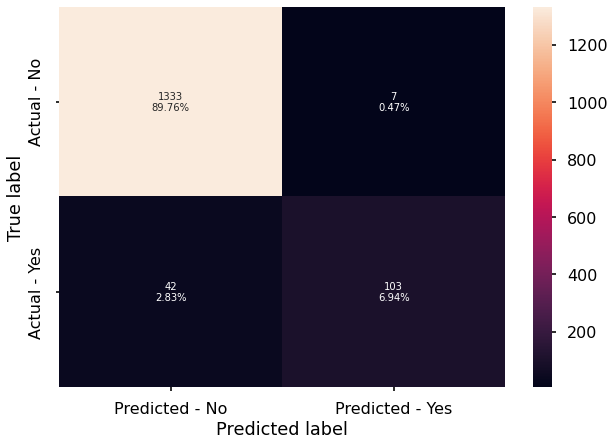

In [ ]:
make_confusion_matrix(dTree1, y_test)

In [ ]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9682356338434883
Accuracy on test set :  0.967003367003367
Recall on training set :  0.7074626865671642
Recall on test set :  0.7103448275862069


### This is good, recall on test and train are similar, and 0.7 is pretty good recal value, although higher the better.

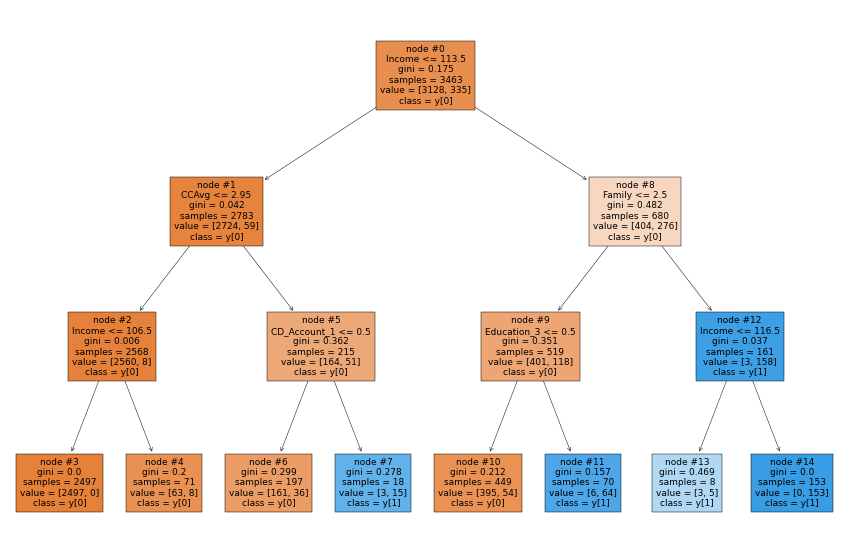

In [ ]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2497.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [63.00, 8.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- weights: [161.00, 36.00] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [3.00, 15.00] class: 1
|--- Income >  113.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- weights: [395.00, 54.00] class: 0
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [6.00, 64.00] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [3.00, 5.00] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 153.00] class: 1



The tree is definitely much cleaner now. The recall is 0.7. We could improve this.

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                       Imp
Income               0.397
Family               0.335
Education_3          0.183
CCAvg                0.052
CD_Account_1         0.033
Age                  0.000
Mortgage             0.000
Education_2          0.000
Securities_Account_1 0.000
Online_1             0.000
CreditCard_1         0.000


* Great! Only Income, Family, Education_3 (advanced), CCAvg, and CD_Account are important variables. Rest others are not important. 
Lets see this in figure.

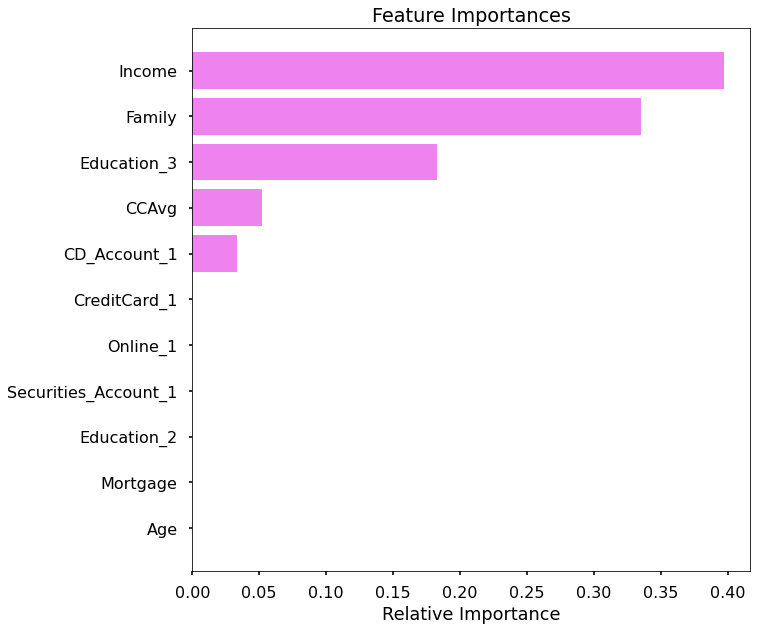

In [ ]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Great! Only Income, Family, Education_3 (advanced), CCAvg, and CD_Account are important variables. Rest others are not important.
* We used depth of only 3.
* Lets try including some more variables, and lets see if we can improve recall.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       random_state=1)

* This gave us: 
max_depth=5,
max_leaf_nodes=10,
min_impurity_decrease=0.001, 
min_samples_leaf=5.

#Lets see the confusion matrix with tuned paraeters.

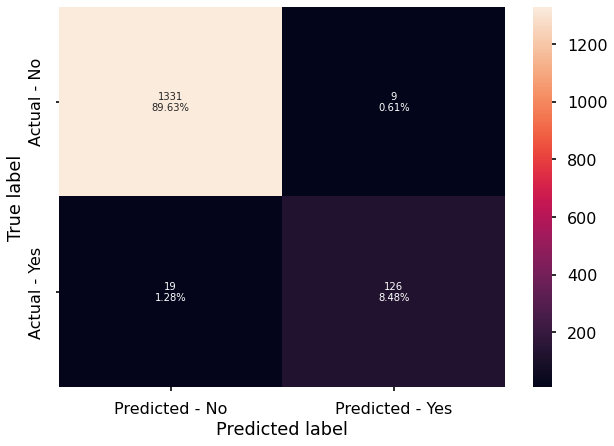

In [ ]:
make_confusion_matrix(estimator,y_test)

#Lets see the recall and precision, and compare that with depth 3.

In [ ]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9861391856771585
Accuracy on test set :  0.9811447811447811
Recall on training set :  0.9044776119402985
Recall on test set :  0.8689655172413793


#**WOW** This is great. The model's recall on train set is 0.9 and test set is 0.86. 

Lets visualize the tree now.

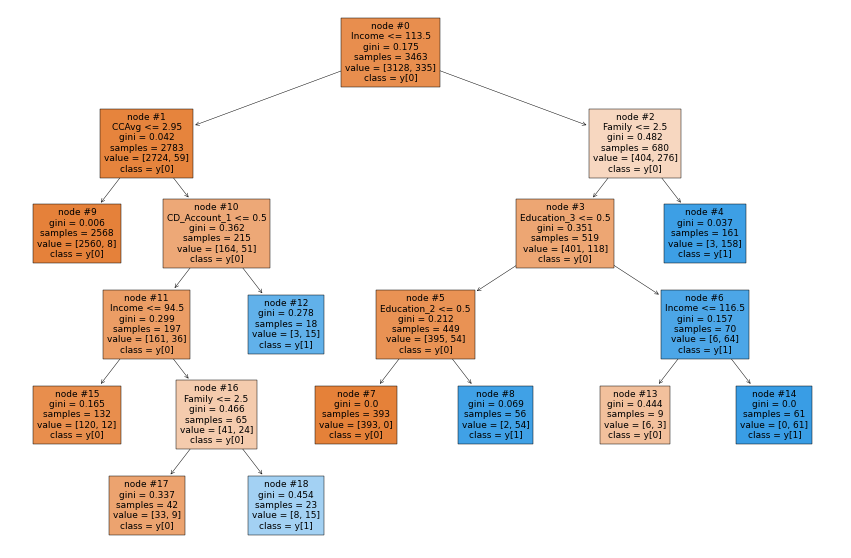

In [ ]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2560.00, 8.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Income <= 94.50
|   |   |   |   |--- weights: [120.00, 12.00] class: 0
|   |   |   |--- Income >  94.50
|   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |--- weights: [33.00, 9.00] class: 0
|   |   |   |   |--- Family >  2.50
|   |   |   |   |   |--- weights: [8.00, 15.00] class: 1
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [3.00, 15.00] class: 1
|--- Income >  113.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [393.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [2.00, 54.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- Income <= 116.50
|   |   |   |   |--- weights: [6.00, 3.00] class: 0
|   |   |   |--- Income >  116.50
|   |   |   |   |--- weights: [0.00, 61.00] clas

In [ ]:
# As above, this will show the importance of each feature in buillding tree. This is normalized index and it is calculated  as the 
# total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance.

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                       Imp
Income               0.335
Family               0.277
Education_2          0.174
Education_3          0.146
CCAvg                0.041
CD_Account_1         0.027
Age                  0.000
Mortgage             0.000
Securities_Account_1 0.000
Online_1             0.000
CreditCard_1         0.000


*This shows that only six predictors are important. Lets see this in figure.

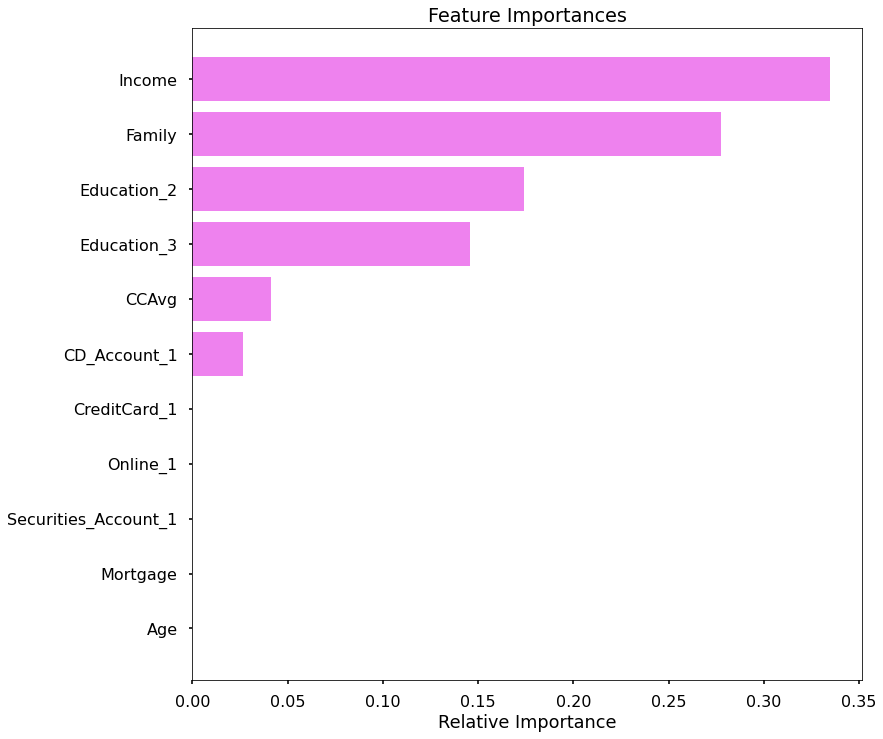

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Most important predictor is income, then family size is the second, education is the third and fourth, CCAvg is the fifth and CD_Account is the sixth important predictor.

#Lets do Post-Prunning.

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000,0.000
1,0.000,0.001
2,0.000,0.001
3,0.000,0.002
4,0.000,0.002
5,0.000,0.003
6,0.000,0.003
7,0.000,0.005
8,0.000,0.005
9,0.000,0.006


* This is how you interpret above chart: look at 0, it is showing that this tree reduces impurities only by 0.00, meaning very small amount. This tree is not very important. But look at 39, if you get rid of tghis tree, you will reduce impurities by 0.047, and it is very important.

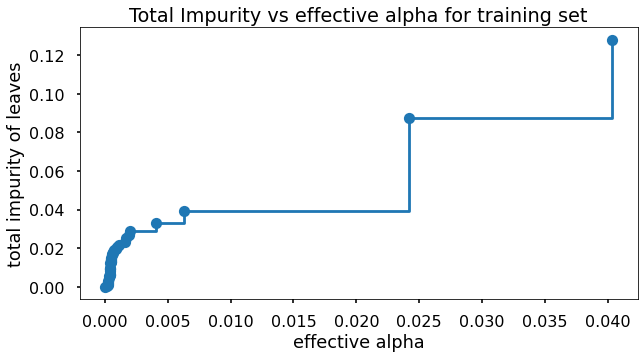

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0467037050176459



We will get rid of the last element in ``clfs`` and ccp_alphas``. We do this because that will leave us with a tree with only one node, the last one. The number of nodes and tree depth decreases as alpha increases.

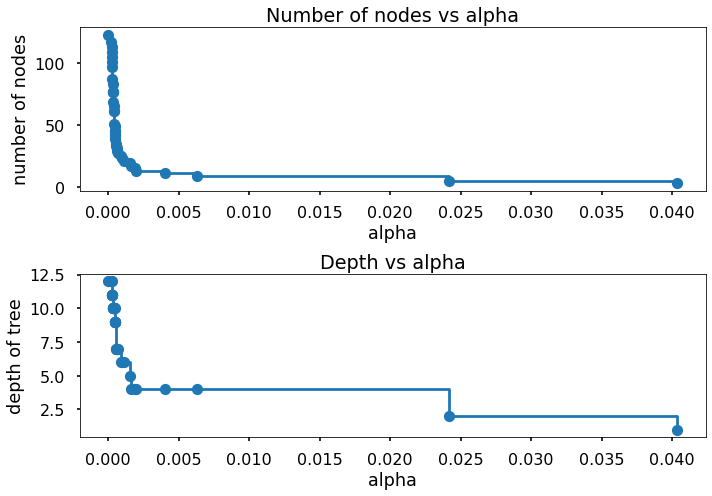

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

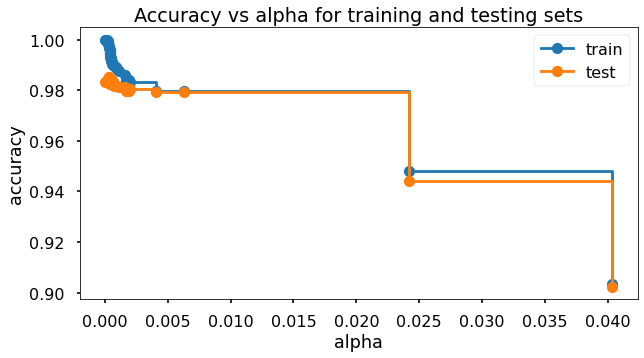

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.00030801809606314373, random_state=1)
Training accuracy of best model:  0.9974010973144672
Test accuracy of best model:  0.9851851851851852


**Lets calculate the Recall, as recall is better performance measure in our case. I did this just for my future reference**

In [ ]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [ ]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

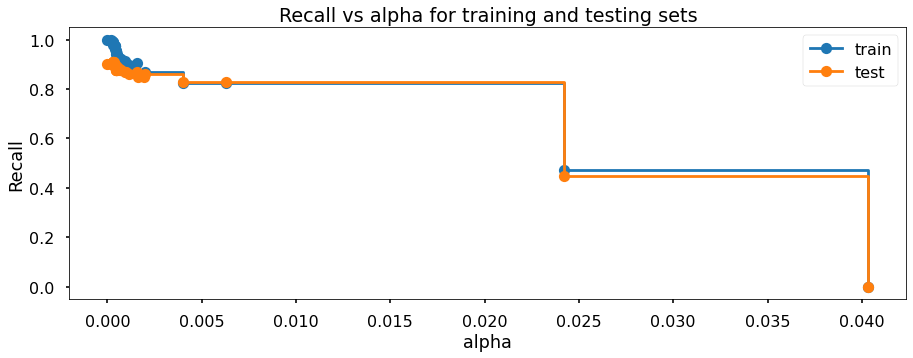

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at alpha 0.0026.**

In [ ]:
#If we want to include different ccp_alpha and weights, this is the way to do. But For us, the best model 
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.0026, class_weight={0: 0.1, 1: 0.9}, max_depth=5, min_impurity_decrease=0.001, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0026, class_weight={0: 0.1, 1: 0.9},
                       max_depth=5, min_impurity_decrease=0.001,
                       random_state=1)

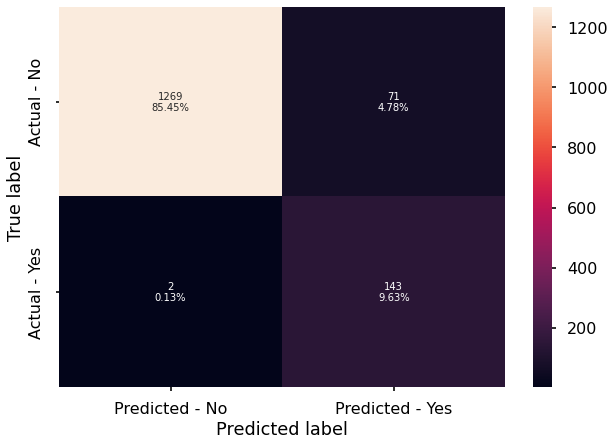

In [ ]:
make_confusion_matrix(best_model2,y_test)

In [ ]:
# Recall on train and test
get_recall_score(best_model2)

Recall on training set :  0.991044776119403
Recall on test set :  0.9862068965517241


##YAY This is great, we have a recall of 0.98 on test set. This is our **Final Model**

Lets see the tree!

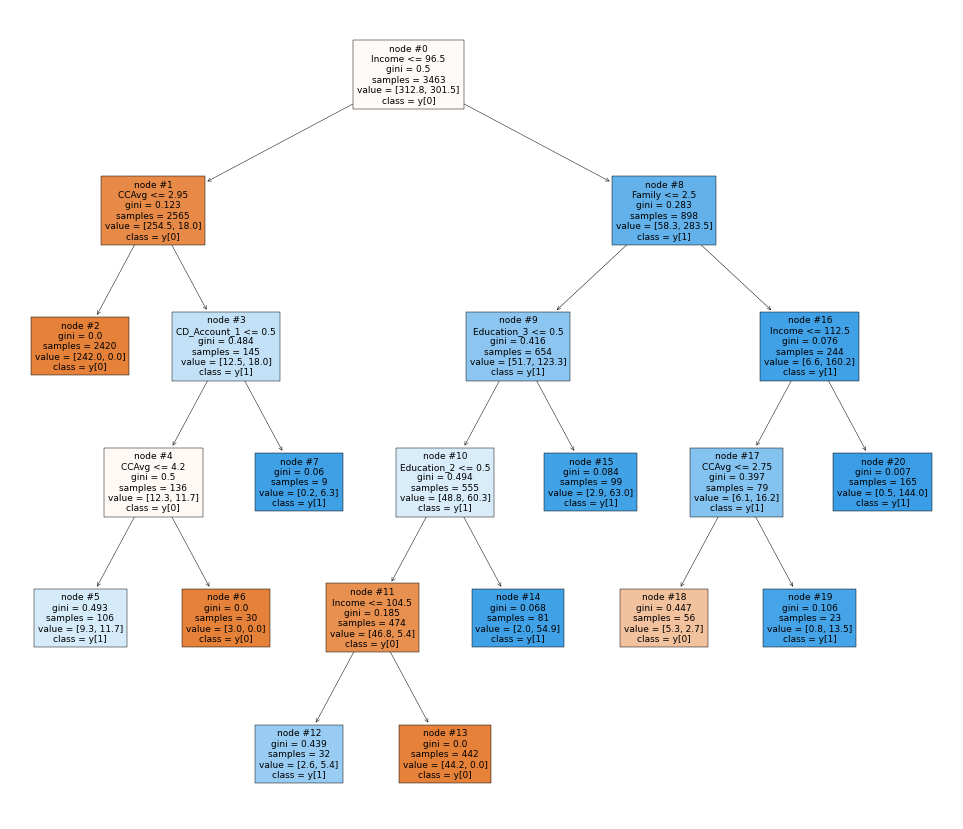

In [ ]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model2,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

## Oh! I love this. How can you not? Look at how neat the tree looks.

In [ ]:
print(tree.export_text(best_model2,feature_names=feature_names,show_weights=True))

|--- Income <= 96.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [242.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 4.20
|   |   |   |   |--- weights: [9.30, 11.70] class: 1
|   |   |   |--- CCAvg >  4.20
|   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [0.20, 6.30] class: 1
|--- Income >  96.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 104.50
|   |   |   |   |   |--- weights: [2.60, 5.40] class: 1
|   |   |   |   |--- Income >  104.50
|   |   |   |   |   |--- weights: [44.20, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [2.00, 54.90] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [2.90, 63.00] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 112.50
|   |   |   |--- CCAvg <= 2.75
|   |   |   |   |--- weights: [5.30, 2.70] 

In [ ]:
# As above, this will show the importance of each feature in buillding tree. This is normalized index and it is calculated  as the 
# total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance.

print (pd.DataFrame(best_model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                       Imp
Income               0.670
Education_2          0.146
CCAvg                0.088
Education_3          0.048
Family               0.040
CD_Account_1         0.009
Age                  0.000
Mortgage             0.000
Securities_Account_1 0.000
Online_1             0.000
CreditCard_1         0.000


Lets see which feature is important.

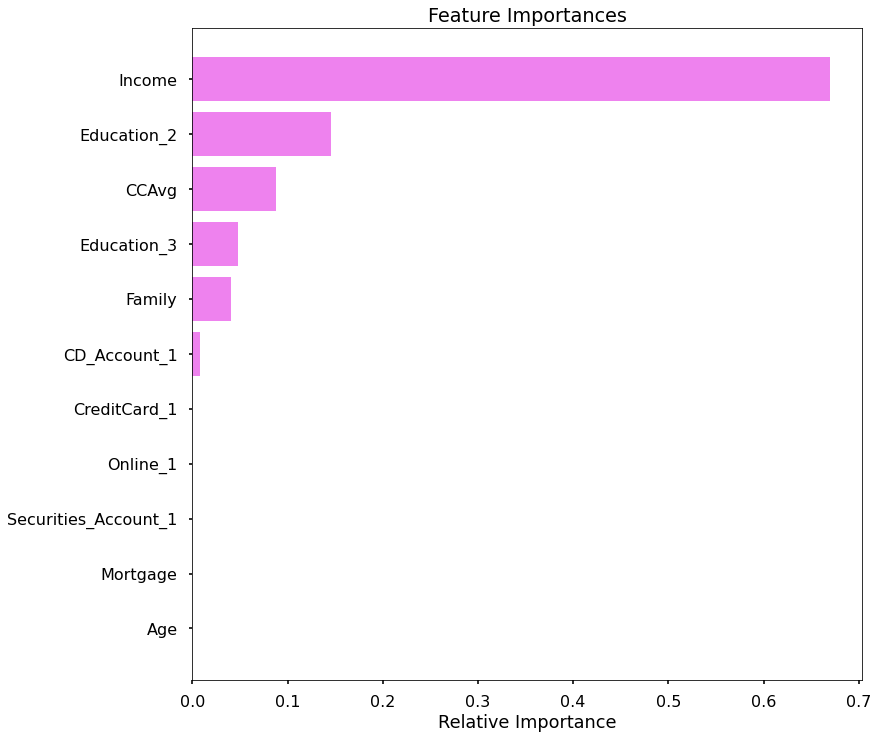

In [ ]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* As before, the best model has Income as the best predictore. 
* Education (Graduate level), CCAvg, Education (Advanced), Family size and CD_Account are other important predictors.


In [ ]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1,0.71,0.90,0.99], 'Test_Recall':[0.9,0.7,0.86,0.98]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.000,0.900
1,Decision tree with restricted maximum depth,0.710,0.700
2,Decision treee with hyperparameter tuning,0.900,0.860
3,Decision tree with post-pruning,0.990,0.980


#**Conclusions:**
* The best model is Decision tree with post-prunning, and it has a recall of 0.99 for train set and 0.98 for test set.
* The most important predictor is Income.
* The other important predictors are: family (second), education (third and fourth), CCAvg (fifth), Age (sixth), CD_Account (seventh), Mortgage (eighth), Online(ninth), CreditCard (tenth).

#**Recommendations:**
* Decision tree can easily take care of multicollinearity, and we dont have to get rid of variables that are correlated. If computation is not an issue, we should use Decision tree.
* Income is the most important predictor of Personal_Loan.
* Other important predictors are Family, Education, and CCAvg.
* In terms of business we should focus on high income customers and customers with larger family sizes. These are our important customers.
* Educated customers should be targeted and there is more chance that they will take loan compared with less educatd customers.

In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/AIML/Loan_Project3/Project3.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/AIML/Loan_Project3/NareshN_Project3.ipynb to html
[NbConvertApp] Writing 4435978 bytes to /content/drive/MyDrive/AIML/Loan_Project3/NareshN_Project3.html
